In [104]:
# the objective is to build a linear regression model on the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [48]:
house=pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
house.shape

(20640, 10)

In [50]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [51]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'], dtype='object')

In [52]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [53]:
# there are 207 missing values in total_bedrooms
# lets drop all the null values

In [54]:
house.dropna(inplace=True)

# EDA

# Univariate

In [10]:
house.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [11]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'], dtype='object')

In [13]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
house['longitude'].nunique()

844

In [14]:
house['latitude'].nunique()

861

In [15]:
house['housing_median_age'].nunique()

52

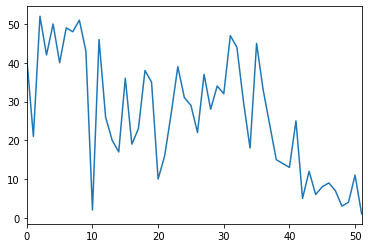

In [24]:
pd.Series(house['housing_median_age'].unique()).plot()

In [16]:
house['total_rooms'].nunique()

5911

In [17]:
house['total_bedrooms'].nunique()

1923

In [18]:
house['population'].nunique()

3879

In [19]:
house['households'].nunique()

1809

In [20]:
house['median_income'].nunique()

12825

In [21]:
house['median_house_value'].nunique()

3833

In [55]:
house['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
# there is one category with very low value

# Bivariate

In [25]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'], dtype='object')

In [26]:
house.groupby('ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.848642,34.560734,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,-119.733085,36.731806,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.261035,37.801304,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,-119.329836,34.736065,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


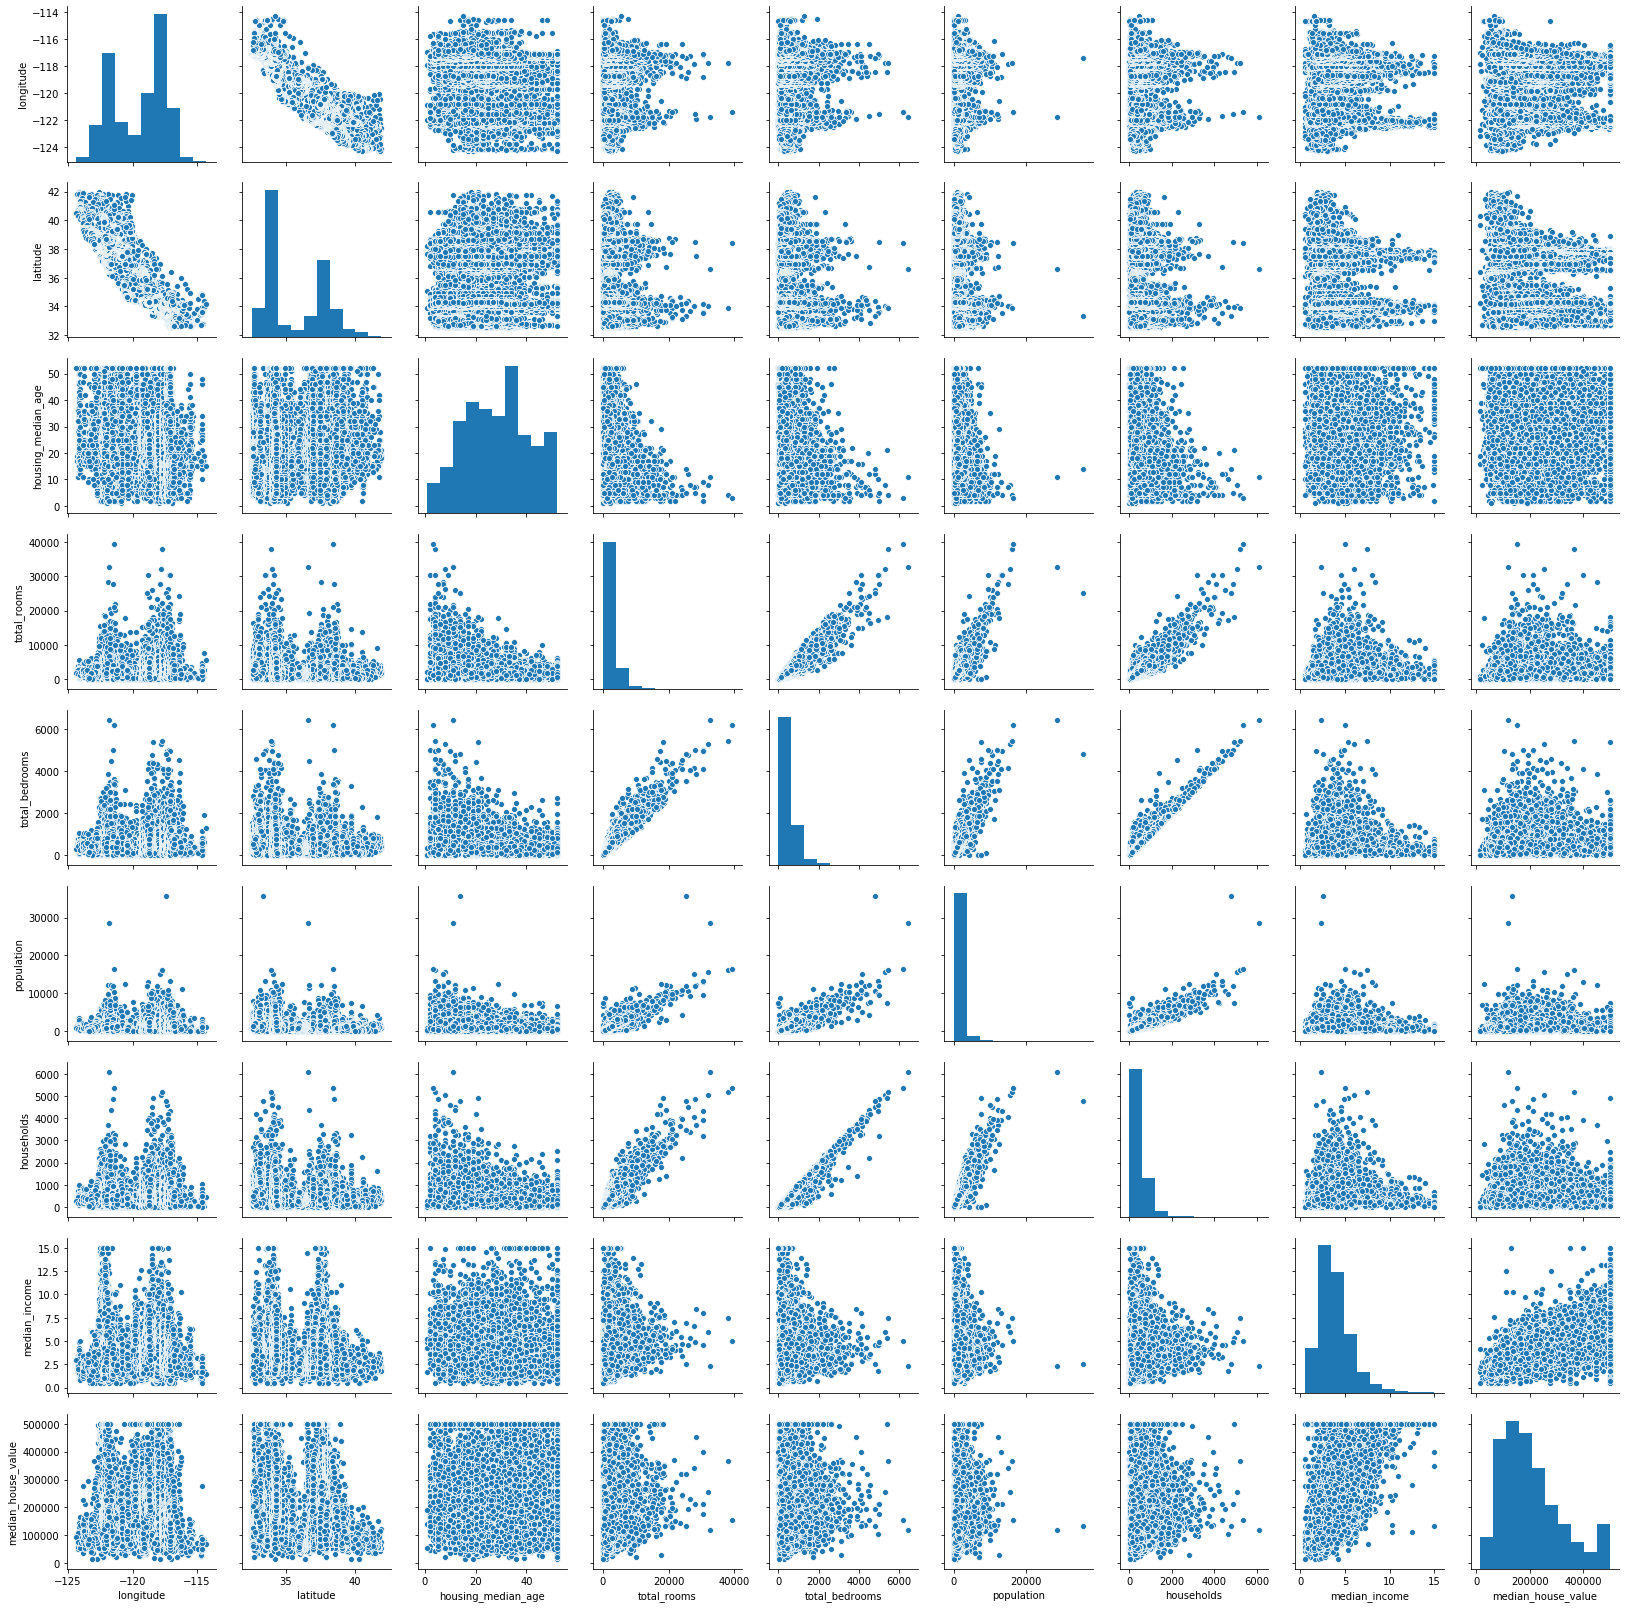

In [28]:
sns.pairplot(data=house,vars=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                              'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])

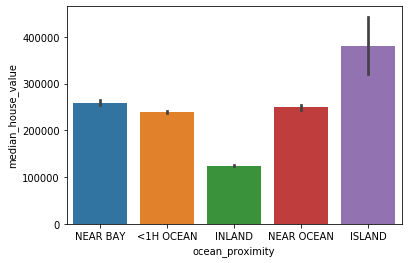

In [29]:
sns.barplot(data=house,x='ocean_proximity',y='median_house_value')

# Distribution and Corr

In [30]:
# lets encode the categorical variables to plot distplot and boxplot

In [56]:
# <1H OCEAN     0
# INLAND        1
# NEAR OCEAN    2
# NEAR BAY      3
# ISLAND        4

In [60]:
# lets encode ocean_proximity
for i in range(len(house)):
    if house['ocean_proximity'].iloc[i]=='<1H OCEAN':
        house['ocean_proximity'].iloc[i]=0
    elif house['ocean_proximity'].iloc[i]=='INLAND':
        house['ocean_proximity'].iloc[i]=1
    elif house['ocean_proximity'].iloc[i]=='NEAR OCEAN':
        house['ocean_proximity'].iloc[i]=2
    elif house['ocean_proximity'].iloc[i]=='NEAR BAY':
        house['ocean_proximity'].iloc[i]=3
    elif house['ocean_proximity'].iloc[i]=='ISLAND':
        house['ocean_proximity'].iloc[i]=4

In [62]:
cols=house.columns.values

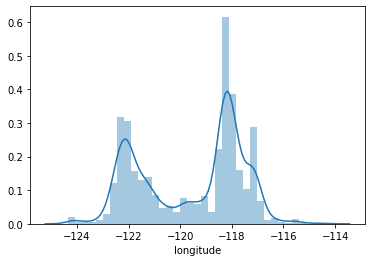

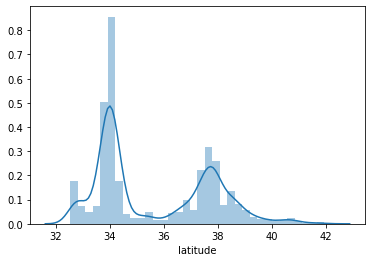

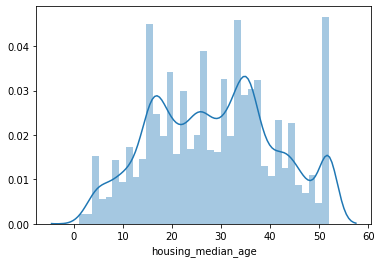

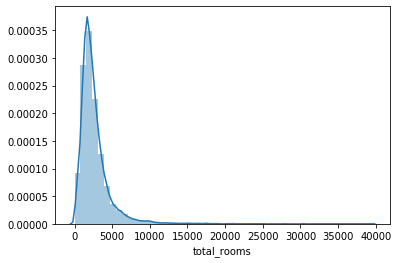

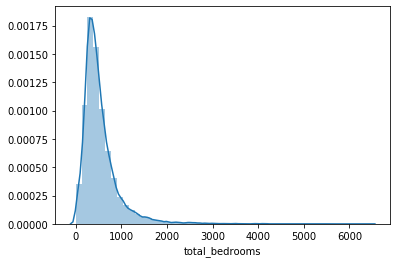

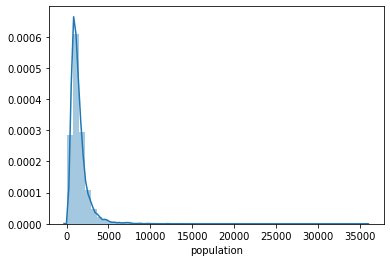

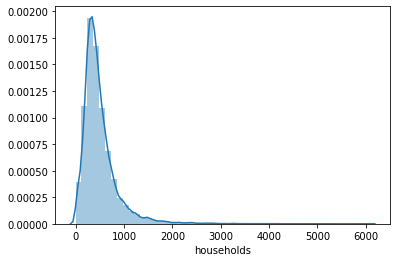

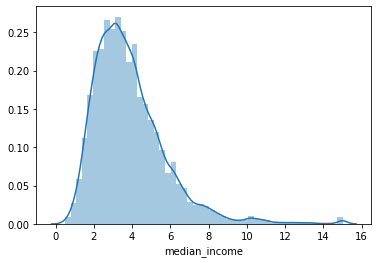

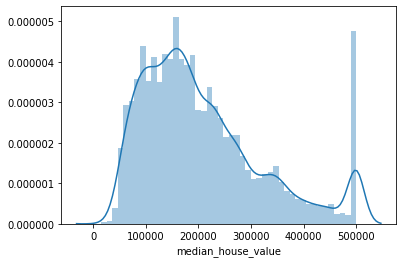

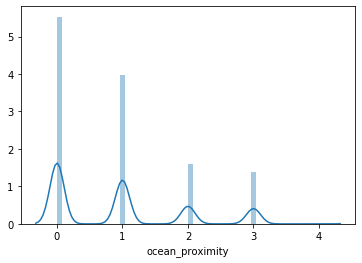

In [64]:
for i in cols:
    plt.subplots()
    sns.distplot(house[i])

In [63]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [65]:
house.skew()

longitude            -0.296141
latitude              0.464934
housing_median_age    0.061605
total_rooms           4.158816
total_bedrooms        3.459546
population            4.960017
households            3.413850
median_income         1.644557
median_house_value    0.978290
ocean_proximity       0.845315
dtype: float64

In [66]:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.439787
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.390885
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.145469
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.016174
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.021466
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.083097
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.027488
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.039270
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.020952
ocean_proximity,-0.439787,0.390885,0.145469,-0.016174,-0.021466,-0.083097,-0.027488,-0.039270,0.020952,1.000000


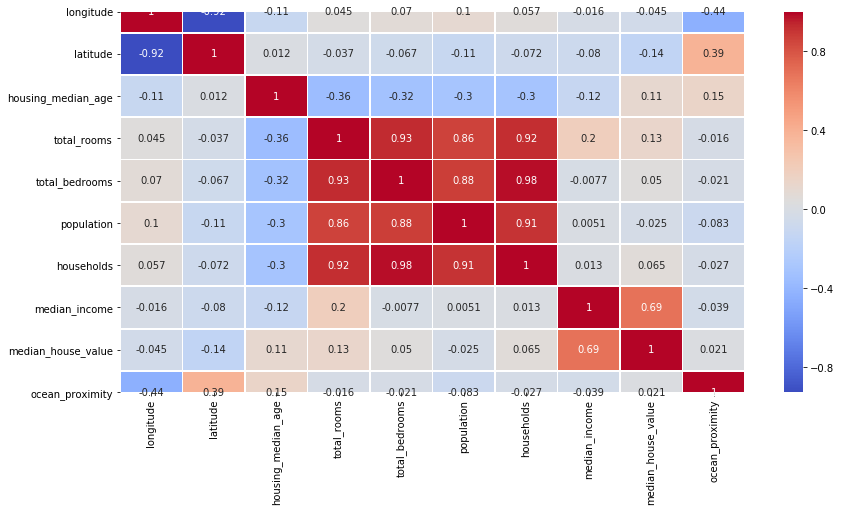

In [67]:
plt.figure(figsize=(14,7))
sns.heatmap(house.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

In [69]:
# very strong negative corr
# latitude and longitude

# very strong +ve corr
# total_bedrooms and total_rooms
# population and total_rooms
# households and total_rooms
# households and total_bedrooms
# population and total_bedrooms
# population and households

# +corr
# median_house_value and median_income

In [228]:
# drop total_bedrooms,household

# population

# Outliers

In [70]:
# lets plot boxplots

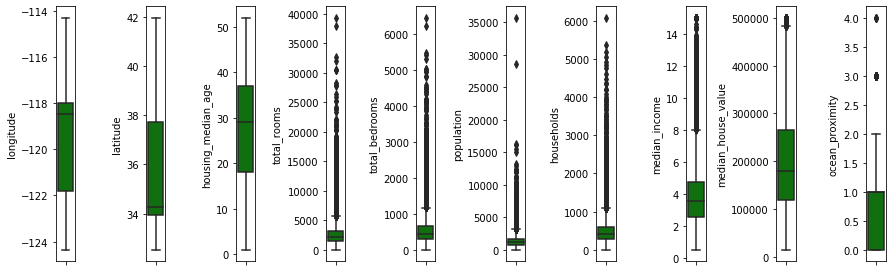

In [71]:
plt.figure(figsize=(15,45))
for i in range(len(cols)):
    plt.subplot(12,12,i+1)
    sns.boxplot(house[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [81]:
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(house))
np.where(z>3)

(array([   95,    95,   104, ..., 20422, 20422, 20422], dtype=int64),
 array([4, 6, 4, ..., 4, 5, 6], dtype=int64))

In [75]:
len(np.where(z>3)[0])

1787

In [76]:
# there are around 1787 outliers

In [77]:
outlier(house)

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value    1064
ocean_proximity       2275
dtype: int64

In [78]:
# lets remove outliers using zscore method
house[(z<3).all(axis=1)].shape

(19544, 10)

In [79]:
# removed 889 rows

In [94]:
# lets make a copy and remove all the outliers using IQR method

In [83]:
# removed around 4889 rows

In [85]:
house2=pd.read_csv('housing.csv')

In [86]:
house2.dropna(inplace=True)

In [87]:
# lets encode ocean_proximity
for i in range(len(house)):
    if house2['ocean_proximity'].iloc[i]=='<1H OCEAN':
        house2['ocean_proximity'].iloc[i]=0
    elif house2['ocean_proximity'].iloc[i]=='INLAND':
        house2['ocean_proximity'].iloc[i]=1
    elif house2['ocean_proximity'].iloc[i]=='NEAR OCEAN':
        house2['ocean_proximity'].iloc[i]=2
    elif house2['ocean_proximity'].iloc[i]=='NEAR BAY':
        house2['ocean_proximity'].iloc[i]=3
    elif house2['ocean_proximity'].iloc[i]=='ISLAND':
        house2['ocean_proximity'].iloc[i]=4

In [88]:
house2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [89]:
house2.shape

(20433, 10)

In [93]:
Q1 = house2.quantile(0.25)
Q3 = house2.quantile(0.75)
IQR = Q3 - Q1

house2 = house2[~((house2 < (Q1 - 1.5 * IQR)) |(house2 > (Q3 + 1.5 * IQR))).any(axis=1)]
house2.shape

(15544, 10)

In [95]:
# a lot of rows removed

# Definitions

In [96]:
# this is a regression problem

In [97]:
# lets seperate x and y first

In [98]:
x=house.drop('median_house_value',axis=1)
y=house['median_house_value']

In [99]:
x2=house2.drop('median_house_value',axis=1)
y2=house2['median_house_value']

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [287]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=3,n_iter=50,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca


def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1,scoring='r2')
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    return x_train, x_test, y_train, y_test

In [103]:
lr=LinearRegression(n_jobs=-1)
adalr=AdaBoostRegressor(random_state=45,base_estimator=lr)

# Iteration 1

In [105]:
# we'll use x and y

In [106]:
# first scale the data
xs=std(x)

In [107]:
print(get_score(lr,xs,y))

(0.6388690116631989, 0.4576833745739236, 69808.74673627646)


In [108]:
# lets remove the skewness from the data

In [109]:
x.skew()

longitude            -0.296141
latitude              0.464934
housing_median_age    0.061605
total_rooms           4.158816
total_bedrooms        3.459546
population            4.960017
households            3.413850
median_income         1.644557
ocean_proximity       0.845315
dtype: float64

In [110]:
# latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity

In [111]:
xc=x.copy()

In [117]:
# xc['latitude'].min(), xc['latitude'].max()
xc['latitude']=np.log(xc['latitude'])
# skewness reduced to 0.40

In [124]:
# xc['total_rooms'].min(), xc['total_rooms'].max()
xc['total_rooms']=np.power(xc['total_rooms'],1/5)
# skewness reduced to 0.02

In [128]:
# xc['total_bedrooms'].min(), xc['total_bedrooms'].max()
xc['total_bedrooms']=np.power(xc['total_bedrooms'],1/5)
# skewness reduced to 0.03

In [134]:
# xc['population'].min(), xc['population'].max()
xc['population']=np.power(xc['population'],1/5)
# skewness reduced to -0.04

In [137]:
# xc['households'].min(), xc['households'].max()
xc['households']=np.power(xc['households'],1/5)
# skewness reduced to -0.08

In [147]:
# xc['median_income'].min(), xc['median_income'].max()
xc['median_income']=np.power(xc['median_income'],1/10)
# skewness reduced to 0.01

In [151]:
# xc['ocean_proximity'].min(), xc['ocean_proximity'].max()
xc['ocean_proximity']=np.power(xc['ocean_proximity'],1/3)
# skewness reduced to -0.06

In [152]:
xc.skew()

longitude            -0.296141
latitude              0.408727
housing_median_age    0.061605
total_rooms           0.025388
total_bedrooms        0.003575
population           -0.043653
households           -0.081002
median_income         0.018347
ocean_proximity      -0.066842
dtype: float64

In [153]:
print(get_score(lr,xc,y))

(0.6205278222430797, 0.4018249783699458, 70458.74449391734)


In [154]:
# lets scale xc
xcs=std(xc)

In [155]:
print(get_score(lr,xcs,y))

(0.6205278222430797, 0.401824978369937, 70458.74449391733)


In [156]:
# xs is performing better than all

# Iteration 2

In [157]:
# we'll use x2 and y2

In [158]:
# lets std scale the data
x2s=std(x2)

In [160]:
print(get_score(lr,x2s,y2))

(0.6127164812048228, 0.3674849930734373, 56854.94144971351)


In [161]:
# the error is lesser than xs

In [162]:
# lets remove skewness
x2c=x2.copy()

In [163]:
x2c.skew()

longitude            -0.536044
latitude              0.727256
housing_median_age    0.026212
total_rooms           0.660311
total_bedrooms        0.626931
population            0.603532
households            0.578317
median_income         0.574442
ocean_proximity       0.606655
dtype: float64

In [164]:
# there is very low skewness already

In [165]:
# lets try to reduce it

In [172]:
x2c['longitude'].min(), x2c['longitude'].max()
np.power(x2c['longitude'],2).skew()
# skewness remained

0.5556473307824099

In [179]:
x2c['latitude'].min(), x2c['latitude'].max()
x2c['latitude']=np.log(x2c['latitude'])
# skewness reduced to 0.62

In [191]:
x2c['total_rooms'].min(), x2c['total_rooms'].max()
x2c['total_rooms']=np.power(x2c['total_rooms'],0.6)
# skewness reduced to 0.06

In [196]:
x2c['total_bedrooms'].min(), x2c['total_bedrooms'].max()
x2c['total_bedrooms']=np.power(x2c['total_bedrooms'],0.6)
# skewness reduced to 0.03

In [199]:
x2c['population'].min(), x2c['population'].max()
x2c['population']=np.power(x2c['population'],0.6)
# skewness reduced to -0.008

In [202]:
x2c['households'].min(), x2c['households'].max()
x2c['households']=np.power(x2c['households'],0.6)
# skewness reduced to -0.03

In [205]:
x2c['median_income'].min(), x2c['median_income'].max()
x2c['median_income']=np.power(x2c['median_income'],0.6)
# skewness reduced to -0.04

-0.042180958235422554

In [212]:
x2c['ocean_proximity'].min(), x2c['ocean_proximity'].max()
x2c['ocean_proximity']=np.power(x2c['ocean_proximity'],0.4)
# skewness reduced to 0.04

In [213]:
x2c.skew()

longitude            -0.536044
latitude              0.663244
housing_median_age    0.026212
total_rooms           0.040351
total_bedrooms        0.030191
population           -0.001893
households           -0.032917
median_income         0.201271
ocean_proximity       0.046030
dtype: float64

In [214]:
# now, lets std scale it
x2cs=std(x2c)

In [215]:
print(get_score(lr,x2cs,y2))

(0.6107326086384206, 0.3736982006599816, 56801.004596551946)


# Conclusion

In [216]:
# the best out of all above iterations is lr with x2cs,y2

# LinearRegression

In [217]:
# Now, we'll apply feature selection using
# BFE
# FFS
# PCA
# Corr

In [218]:
x2cs.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.425587,1.038163,0.306662,-0.751131,-1.195651,-1.266408,-1.264252,1.640848,-1.014703


In [219]:
# there are 9 features

In [220]:
# lets apply BFE
for i in range(4,10):
    print(i, " ", modified_bfe(lr,x2cs,y2,i))

4   0.12060119572547656
5   0.30326454245706236
6   0.3369545263935323
7   0.36165313528309617
8   0.3721881676713654
9   0.3736982006599816


In [221]:
# we won't apply bfe

In [222]:
# lets apply FFS
for i in range(4,10):
    print(i, " ", modified_ffs(lr,x2cs,y2,i))

4   -0.02587379976683457
5   0.07219329539619701
6   0.14103009107676112
7   0.16379248286060855
8   0.1846754810534531
9   0.3736982006599816


In [223]:
# we won't apply FFS

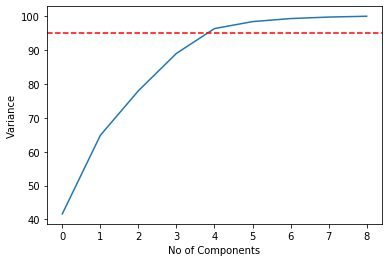

In [224]:
# lets apply PCA
nforpca(x2cs)

In [225]:
# lets apply PCA
for i in range(4,10):
    print(i, " ", modified_pca(lr,x2cs,y2,i))

4   -0.5353101286965944
5   -0.1758233605203714
6   -0.04708579456861606
7   0.35317853547151823
8   0.3637452168141362
9   0.3736982006599807


In [226]:
# we won't use PCA

In [227]:
# lets use correlation to drop some features

In [229]:
# drop total_bedrooms,households

# population

In [230]:
x2cs_red=x2cs.drop(['total_bedrooms','households','population'],axis=1)

In [231]:
get_score(lr,x2cs_red,y2)

(0.5472917554640044, 0.15700206164946673, 61896.28403888847)

In [232]:
# the score reduced
# lets just drop total_bedrooms
x2cs_red1=x2cs.drop(['total_bedrooms'],axis=1)

In [233]:
get_score(lr,x2cs_red1,y2)

(0.6011620649038111, 0.33827272018175814, 57573.132973520616)

In [234]:
# the score reduced

In [235]:
x2cs_red2=x2cs.drop(['population'],axis=1)
get_score(lr,x2cs_red2,y2)

(0.5697756941757859, 0.24648126785922653, 60298.53671490133)

In [236]:
x2cs_red3=x2cs.drop(['households'],axis=1)
get_score(lr,x2cs_red3,y2)

(0.6088930108186565, 0.3721881676713654, 56863.55649198423)

In [237]:
x2cs_red4=x2cs.drop(['total_bedrooms','households'],axis=1)
get_score(lr,x2cs_red4,y2)

(0.576403092182701, 0.2674357767730783, 59319.46565929908)

In [255]:
# lets investigate the coef and check the assumptions of our model

In [256]:
lrn=LinearRegression(n_jobs=-1,normalize=True)

In [257]:
xtr,xte,ytr,yte=tts(x2cs,y2)

In [258]:
pred=get_pred(lrn,x2cs,y2)

In [259]:
residual=pd.DataFrame({'fitted':yte,
                      'predicted':pred})

In [260]:
residual['errors']=residual['fitted']-residual['predicted']

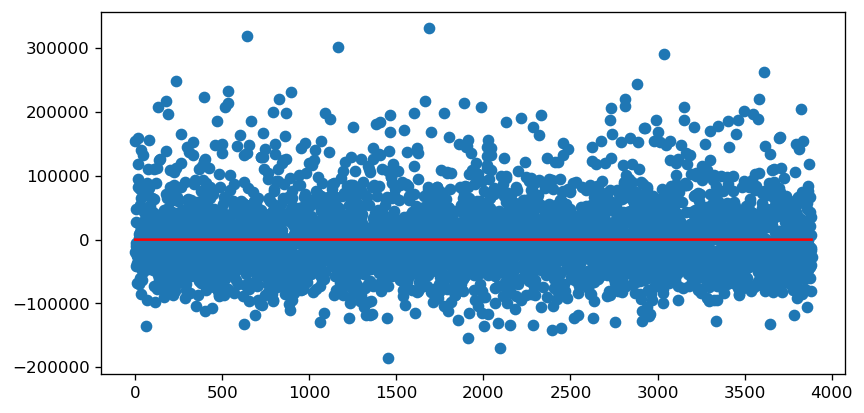

In [263]:
# plotting residual curve
plt.figure(figsize=(8,4),dpi=120)
f=range(len(yte))
k=[0 for i in range(len(yte))]
plt.scatter(f,residual.errors[:],label='errors')
plt.plot(f,k,color='red',label='regression line')
plt.show()

In [264]:
# the variance is constant

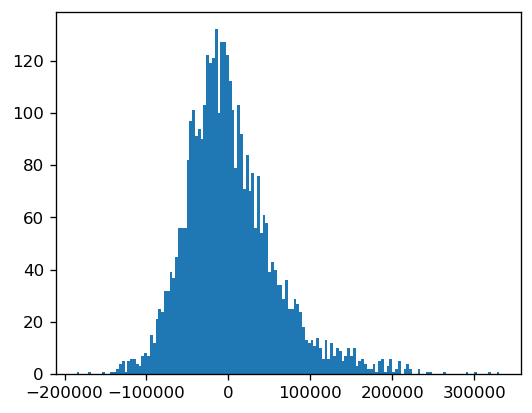

In [266]:
# checking distribution of errors
plt.figure(figsize=(5,4),dpi=120)
plt.hist(residual.errors,bins=150)
plt.show()

In [267]:
# the distribution is almost normal

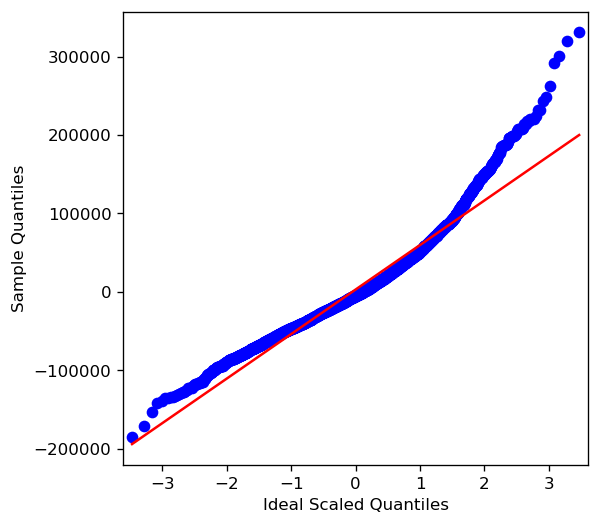

In [268]:
# checking qq plot
from statsmodels.graphics.gofplots import qqplot
fig,ax=plt.subplots(figsize=(5,5),dpi=120)
qqplot(residual.errors,line='s',ax=ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.show()

<BarContainer object of 9 artists>

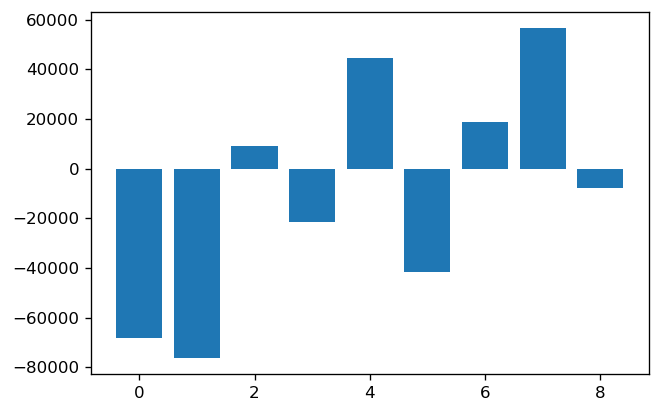

In [269]:
# Model Interpretabilty
lrn.fit(xtr,ytr)
plt.figure(figsize=(6,4),dpi=120)
x=range(len(xtr.columns))
y=lrn.coef_
plt.bar(x,y)

In [270]:
coeff=pd.DataFrame({'variable':xtr.columns.values,
                   'coef':lrn.coef_.ravel()})
coeff

,variable,coef
0,longitude,-68312.936490
1,latitude,-76184.340623
2,housing_median_age,9022.799229
3,total_rooms,-21340.052430
4,total_bedrooms,44510.616861
5,population,-41409.262797
6,households,18912.772514
7,median_income,56515.059035
8,ocean_proximity,-7845.944347


In [271]:
coeff.sort_values(by='coef')

,variable,coef
1,latitude,-76184.340623
0,longitude,-68312.936490
5,population,-41409.262797
3,total_rooms,-21340.052430
8,ocean_proximity,-7845.944347
2,housing_median_age,9022.799229
6,households,18912.772514
4,total_bedrooms,44510.616861
7,median_income,56515.059035


In [272]:
# lets remove ocean_proximity
x2cs_coef=x2cs.drop('ocean_proximity',axis=1)

In [273]:
get_score(lrn,x2cs_coef,y2)

(0.6050271147936324, 0.3555636120064888, 57270.24823441089)

In [274]:
# the score reduced

In [275]:
# there is no use of reducing the features
# we'll proceed with 9 features only

In [276]:
# No hyper tuning is possible with the model

In [277]:
# lets try to boost the model 

In [278]:
adalr=AdaBoostRegressor(random_state=45,base_estimator=lrn,learning_rate=0.001,n_estimators=50)
get_score(adalr,x2cs,y2)

(0.610826689161208, 0.37861413286798884, 56789.52726339994)

In [279]:
# the score improved a little bit

In [288]:
# lets try to cross val adalr,x2cs,y2
for i in range(2,14):
    print(i, " ", cross(adalr,x2cs,y2))

2   (0.5514553498745711, 0.057725967863131236)
3   (0.5514553498745711, 0.057725967863131236)
4   (0.5514553498745711, 0.057725967863131236)
5   (0.5514553498745711, 0.057725967863131236)
6   (0.5514553498745711, 0.057725967863131236)
7   (0.5514553498745711, 0.057725967863131236)
8   (0.5514553498745711, 0.057725967863131236)
9   (0.5514553498745711, 0.057725967863131236)
10   (0.5514553498745711, 0.057725967863131236)
11   (0.5514553498745711, 0.057725967863131236)
12   (0.5514553498745711, 0.057725967863131236)
13   (0.5514553498745711, 0.057725967863131236)


In [284]:
crosspred=cross_val_predict(adalr,x2cs,y2,cv=4)

In [285]:
print(mean_squared_error(y2,crosspred))
print(mean_absolute_error(y2,crosspred))
print(np.sqrt(mean_squared_error(y2,crosspred)))

3532546620.481485
44551.14374157774
59435.23046545277


In [286]:
# lets save the cross validated model
cv_results = cross_validate(adalr, x2cs,y2, cv=4, return_estimator=True)
lr_fit = cv_results['estimator']
print(lr_fit)

(AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True, n_jobs=-1,
                                                  normalize=True),
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=45), AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True, n_jobs=-1,
                                                  normalize=True),
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=45), AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True, n_jobs=-1,
                                                  normalize=True),
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=45), AdaBoostRegressor(base_estimator=LinearRegres

In [289]:
lr_fit=lr_fit[0]

In [290]:
import joblib
joblib.dump(lr_fit,'lr_housing.pkl')

['lr_housing.pkl']